# Convolutional Neural Network for Sign Language MNIST
## About this dataset

The original MNIST image dataset of handwritten digits is a popular benchmark for image-based machine learning methods but researchers have renewed efforts to update it and develop drop-in replacements that are more challenging for computer vision and original for real-world applications. As noted in one recent replacement called the Fashion-MNIST dataset, the Zalando researchers quoted the startling claim that "Most pairs of MNIST digits (784 total pixels per sample) can be distinguished pretty well by just one pixel". To stimulate the community to develop more drop-in replacements, the Sign Language MNIST is presented here and follows the same CSV format with labels and pixel values in single rows. The American Sign Language letter database of hand gestures represent a multi-class problem with 24 classes of letters (excluding J and Z which require motion).




## Importing dependencies

In [1]:
import pandas as pd
import numpy as np
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt

## Specifying the training data and testing data paths

In [2]:
TRAIN_PATH = 'data/sign_mnist_train.csv'
VALID_PATH = 'data/sign_mnist_test.csv'
NO_CLASSES = 26

## Reading the data

In [3]:
trainData = pd.read_csv(TRAIN_PATH)
validData = pd.read_csv(VALID_PATH)

## Transforming the data so that it can be fed into the CNN

In [4]:
x_train = np.array(trainData.drop(columns=['label']))
y_train = np.array(trainData['label'])
x_valid = np.array(validData.drop(columns=['label']))
y_valid = np.array(validData['label'])

## Scaling the data for computational efficiency

In [5]:
x_train = x_train.reshape(len(x_train),28,28,1)
x_train = x_train/255.0
x_valid = x_valid.reshape(len(x_valid),28,28,1)
x_valid = x_valid/255.0

x_train.shape, y_train.shape, x_valid.shape, y_valid.shape

((27455, 28, 28, 1), (27455,), (7172, 28, 28, 1), (7172,))

## Defining Model Architecture

In [6]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(30, (5, 5), input_shape=(28, 28, 1), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(tf.keras.layers.Conv2D(15, (3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(50, activation='relu'))
model.add(tf.keras.layers.Dense(26, activation='softmax'))

W0905 20:42:22.525076   852 deprecation.py:506] From C:\Users\admin\Anaconda3\envs\ml\lib\site-packages\tensorflow\python\ops\init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


## Compiling the model and training it

In [8]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(x_train,y_train, epochs=7, validation_data=(x_valid,y_valid))
model.save('sign_language_mnist_cnn.h5')

Train on 27455 samples, validate on 7172 samples
Epoch 1/7
27455/27455 [==============================] - 6s 205us/sample - loss: 0.0269 - acc: 0.9914 - val_loss: 0.3106 - val_acc: 0.9141
Epoch 2/7
27455/27455 [==============================] - 5s 194us/sample - loss: 0.0241 - acc: 0.9926 - val_loss: 0.2949 - val_acc: 0.9239
Epoch 3/7
27455/27455 [==============================] - 5s 194us/sample - loss: 0.0191 - acc: 0.9949 - val_loss: 0.3485 - val_acc: 0.9166
Epoch 4/7
27455/27455 [==============================] - 5s 195us/sample - loss: 0.0155 - acc: 0.9956 - val_loss: 0.3724 - val_acc: 0.9215
Epoch 5/7
27455/27455 [==============================] - 5s 196us/sample - loss: 0.0188 - acc: 0.9945 - val_loss: 0.3790 - val_acc: 0.9208
Epoch 6/7
27455/27455 [==============================] - 5s 195us/sample - loss: 0.0116 - acc: 0.9960 - val_loss: 0.3414 - val_acc: 0.9286
Epoch 7/7
27455/27455 [==============================] - 5s 195us/sample - loss: 0.0138 - acc: 0.9954 - val_loss: 0.4

### The training accuracy of this model is : ```0.9954```
### The validation accuracy of this model is : ```~92```




## Testing on some data


In [9]:
testImage = x_valid[0] #We will take an image from the training dataset
prediction = model.predict(testImage.reshape(-1,28,28,1)) #Model takes input as 4 dimensions, so we reshape it.

## Display the result

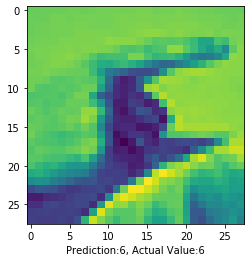

In [10]:
plt.imshow(testImage.reshape(28, 28)) #plt.imshow() requires a 2D array, so we reshape the input
plt.xlabel(f"Prediction:{np.argmax(prediction)}, Actual Value:{y_valid[0]}")
plt.show()